# Espiral builts from semicircunferences



In [1]:
#Librerias
import numpy as np

from scipy import integrate
from filon import cos_integral
from filon import sin_integral
import pylab as plt
from scipy.integrate import simps
from scipy import interpolate 
from filon import cos_integral
import scipy.interpolate as interpolate


## Distancia Espiral construida por semicircunferencias

# $S= (i+1)\pi(R_o+0.5i\Delta R)$

# $\varphi= \frac{S}{R_o + 0.5i\Delta R}$

In [385]:
n= 10 # number of semi-arcs s
def pos(S,R0,dr):
        ss= np.zeros(n)
        rr= np.zeros(n)
        RR= np.zeros(n)
        for i in range(n):
            ss[i] = (i+1)*np.pi*(R0+0.5*i*dr)
            rr[i] = R0 + i*dr
            RR[i] = R0 + 0.5*i*dr
            if  S <= ss[i]:
                PHI = (S/RR[i])
       # print(ss,rr)
        i=0
        phi=0     
        while i <= n:
           
            if S > ss[i]:
                i=i+1
            else:
                sss= abs(S-ss[i])
                phi= np.pi - sss/rr[i] 
                R=rr[i]
                r =RR[i]
                #PHI = (S/r)
                if i % 2 == 0:          
                    x=R*np.cos(phi)
                    y=R*np.sin(phi)
                elif i%2 == 1:
                    phi= phi+ np.pi          
                    x=R*np.cos(phi)+dr
                    y=R*np.sin(phi)
                return [x,y,R,PHI]

def distancia(s,sd,R0,dr):
    xs,ys,Rs,fis=pos(s,R0,dr)
    xd,yd,Rd,fid=pos(sd,R0,dr)
    return [np.sqrt((xs-xd)**2+(ys-yd)**2 + 0.25),Rs,xs,ys,fis,fid]

In [390]:
NP= 250
Rr0= 2   # Initial Radius of  de Curvature
DR=0.1
# Raise in semi-arc
sf=SF=narc*(Rr0+0.5*(narc-1)*DR)*np.pi  #Total Arc length of Spiral
Phi=np.zeros(NP)
Rs=np.zeros(NP)
Xs=np.zeros(NP)
Ys=np.zeros(NP)
Ss=np.zeros(NP)
hh=sf/(NP-1)
for j in range(1,NP+1):
    s = hh*(j-1)
    Red,RadiosS,XS,YS,fis,fid = distancia(s,0,Rr0,DR)
    Phi[j-1] = fis
    Rs[j-1] = RadiosS
    Xs[j-1] = XS
    Ys[j-1] = YS
    Ss[j-1] = s

In [391]:
5*np.pi

15.707963267948966

In [392]:
Ss[-1],Phi[-1]

(34.55751918948772, 14.105109873260293)

Text(1,3,' $R_o =2, \\Delta R = 0.1  $')

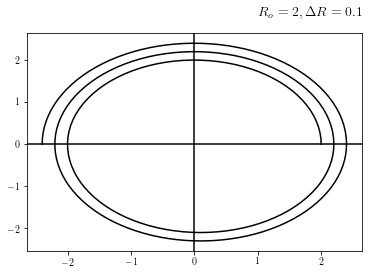

In [393]:
plt.plot(Xs,Ys, color="black", linewidth=1.5, linestyle="-")
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.annotate(" $R_o =2, \Delta R = 0.1  $", xy=(-2,-2), xytext=(1, 3),size=14)
#plt.grid()
#plt.savefig('Spiral01.png', format='png', dpi=1000)
#plt.plot(Phi, color="red", linewidth=1.5, linestyle="-")

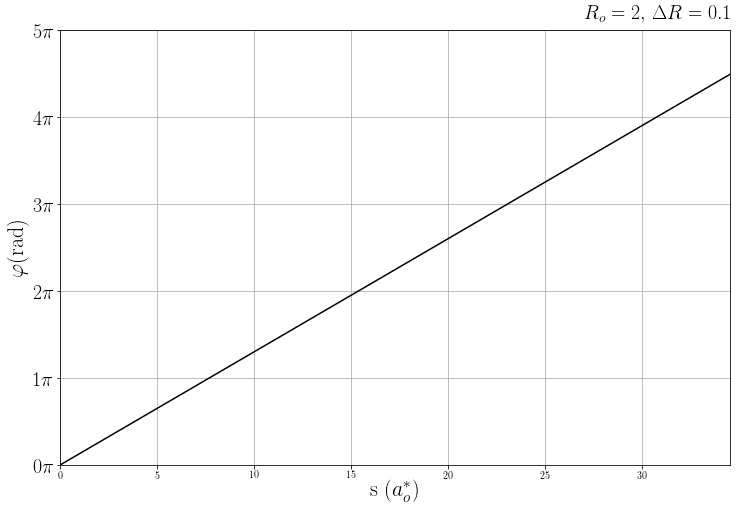

In [394]:
fig=plt.figure(figsize=(12,8) )#pi=1000)
ax = fig.add_subplot(1, 1, 1)
plt.plot(Ss,Phi, color="black", linewidth=1.5, linestyle="-")

#plt.axhline(0, color='black')
#plt.axvline(0, color='black')

ax.set_xlim(0 , Ss.max())# Phi.max())
ax.set_ylim(0 , Phi.max())
x_pi   = Phi
unit   = 1
y_tick = np.arange(0, 5+unit, 1*unit)
y_label = [r"$" + format(r, ".1g")+ r"\pi$" for r in y_tick] # [r"$0$", r"$3 \pi$", r"$6\pi$", r"$9\pi$" ]#,   r"$+\frac{\pi}{2}$"]
ax.set_yticks(y_tick*np.pi)
ax.set_yticklabels(y_label, fontsize=20)
ax.set_xlabel('s ($a_o^*$)', fontsize=22)
ax.set_ylabel('$\\varphi $(rad)', fontsize=22)
plt.annotate(" $R_o = 2 ,  \, \Delta R = 0.1  $", xy=(2,3), xytext=(27, 16),size=20)

plt.grid()
#plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='off')
#plt.savefig('phiS01.png', format='png', dpi=1000)
#plt.box(False)

## Effective potential:$V_{pot}(x,y,z)= V_{pot}(s) = -\frac{1}{4R_s^2} -\frac{2}{\sqrt{(xs-xd)^2 +(ys-yd)^2 + 0.025}}$
###  Coefic de Vpot: $\frac{1}{S_f} \int \limits_0^{S_f} V_{pot}(s)\cos\left(\frac{k\pi}{S_f}s\right) \mathrm{d}s$
####  Filon.cos_integral calculates the integral:  $ \int_{x_0}^{2n\Delta x} f(x) \cos(k x) dx $

In [93]:
#Parametros: Campo Eléctrico


#-----------------Angulo de campo electrico entre 0 y 2pi?
teta =0.0
F_grid_CAMP_kv =   np.array([0.0, 1.0, 3.0, 5.0]) #np.linspace(0, 2.0, 100)
nF= len(F_grid_CAMP_kv)
Camp_F = np.zeros(nF)

Camp_F[:]= 0.17*F_grid_CAMP_kv[:]   #adimencional Field
klave=1

In [94]:
def Vpot(s,sd,f):
    Vpot = np.zeros(nF)
    Red,Rs,XS,YS,fis,FID=distancia(s,sd,Rr0,DR)
    ro= Rs
    Vpot[f]=Camp_F[f]*ro*np.cos(fis-teta)-0.25/(Rs**2) - 2.0/(Red**2)
    return Vpot[f]

In [264]:
#Parametros de la integral (sF,Vpot,ND,CF,AR,EV,VECR) 
#---------------------------------------------------
# Donor position
SD_grid = np.array([0.2*SF, 0.5*SF, 0.85*SF]) #(ssfi(4*np.pi)),(ssfi(6*np.pi))]) np.array([26.77, 45.01])
Ndonor = len(SD_grid)
phi_D = np.zeros(Ndonor)
#---------------------------------------------------
                    # Electron position
Nelectron=501
SE_grid = np.linspace(0, sf, Nelectron) 
phi_e=np.zeros(Nelectron) # Electron position
SF_SD= np.zeros(Ndonor)

ds= sf/(Nelectron)

    
#---------------------------------------------------
                    # Potential 
VS=np.zeros(shape=(nF,Ndonor,Nelectron)) #ARRAY 3D nn--->electric Fields ND---> Fourier COEF 
kindex=np.zeros(Nelectron)
VSR=np.zeros(shape=(nF,Ndonor,Nelectron))
#---------------------------------------------------       
VS1=np.zeros(shape=(nF,Ndonor,Nelectron))
kindex1=np.zeros(Nelectron)
for f  in range(0, nF):
    for j  in range(1, Ndonor+1):
        sd = SD_grid[j-1]
        SF_SD[j-1] = sd/sf 
        XD,YD,RD,phi_D[j-1] = pos(sd,Rr0,DR)
        for k in range( 0,Nelectron):
            se =SE_grid[k]
            XS,YS,RS,fis = pos(se,Rr0,DR)
            phi_e[k]= fis
            kindex[k]= (k*np.pi/sf)
            VS[f,j-1,k] = Vpot(se,sd,f)



In [265]:
Camp_F/0.17

array([0., 1., 3., 5.])

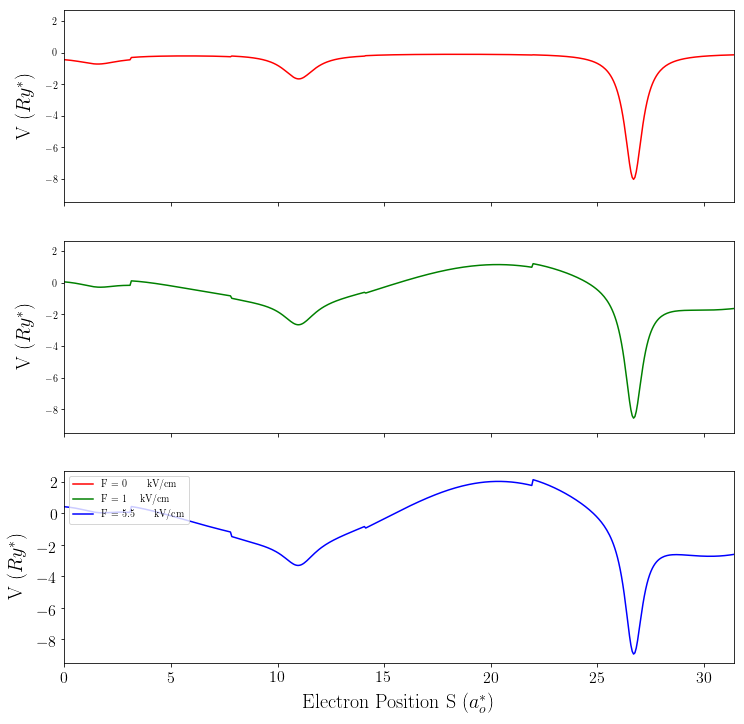

In [384]:
f, (ax1, ax2, ax3) = plt.subplots(3, figsize=(12,12),sharex=True, sharey=True)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
l1,=ax1.plot(SE_grid,VS[0,2,:], color='r', label='Blue stars')
l2,=ax2.plot(SE_grid,VS[2,2,:], color='g')
l3,=ax3.plot(SE_grid,VS[3,2,:], color='b')

plt.xlabel(r' Electron Position S ($a_o^*$) ', labelpad=10,fontsize=20,fontweight='bold', horizontalalignment='center')           
plt.ylabel(r'V ($Ry^*$)',labelpad=10,fontsize=20,fontweight='bold', horizontalalignment ='center')
        
ax1.set_ylabel(r'V ($Ry^*$)',labelpad=10,fontsize=20,fontweight='bold', horizontalalignment ='center')
ax2.set_ylabel(r'V ($Ry^*$)',labelpad=10,fontsize=20,fontweight='bold', horizontalalignment ='center')

plt.xlim(0, SE_grid.max())
#plt.ylim(-4,1.5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

#ax1.set_ylim(-5.5,0)
#ax2.set_ylim(-3.5,0.5)
#ax3.set_ylim(-3,1.5)
plt.legend([l1, l2, l3],["F = 0 \,\, \quad kV/cm", "F = 1 \, \,  kV/cm", "F = 5.5 \,\, \quad kV/cm"], loc=(2))

#plt.legend([l1, l2, l3],["$S_D/S_F = 0.6$ "   ," $S_D/S_F = 0.4$", "$S_D/S_F = 0.2$\,\, "], loc=(0))
#plt.savefig('VpotSE.pdf',format='pdf', dpi=1000,bbox_inches="tight")
#plt.savefig('VpotEF.png',format='png', dpi=1000,bbox_inches="tight")
plt.show()

In [ ]:
### Filon's Method : Highly Oscillatory Integrals

#### Integral parameters to COEF and COEF1


##### $COEF= \int\limits_0 ^{SF} VS\cos\left(\frac{k\pi}{S_f}s\right) \mathrm{d}s = \int\limits_0 ^{SF}  VS\cos\left( \, \mathrm{kindex}\,  s\right) \mathrm{d}s  $
###### $kindex=\frac{k\pi}{S_f}$

##### $COEF1= \int\limits_0 ^{SF} VS\cos\left(\frac{k\pi}{S_f}s\right) \mathrm{d}s = \int\limits_0 ^{\pi}  VS1(\frac{SF}{\pi} x) \cos\left( \, \mathrm{k}\,  x\right) \mathrm{d}x  $
###### $kindex1=k$

In [18]:
#Calculation of the Fourier coefficients in Vpot(x) the Fourier series expansion

COEF=np.zeros((nF,Ndonor,Nelectron))
for j in range(0,Ndonor):
    for i in range(0,nF):
        COEF[i,j,:]=(1/sf)*(cos_integral(VS[i,j,:],ds, kindex, x0=0.0, axis=0))
#plt.plot(kindex, COEF[-1,6,:])

In [19]:
COEF=np.zeros((nF,Ndonor,Nelectron))
SIN_C =np.zeros((nF,Ndonor,Nelectron))
COEF1=np.zeros((nF,Ndonor,Nelectron))
SIN_C1 =np.zeros((NP,Ndonor,Nelectron))

for i in range(0,nF):
    for j in range(0,Ndonor):
        COEF[i,j,:]=(1/SF)*(cos_integral(VS[i,j,:],ds, kindex, x0=0.0, axis=0))
        SIN_C[i,j,:]=(1/SF)*(sin_integral(VS[i,j,:],ds,kindex, x0=0.0, axis=0))
        COEF1[i,j,:]=(1/np.pi)*(cos_integral(VS1[i,j,:],dx,kindex1, x0=0.0, axis=0))
        SIN_C1[i,j,:]=(1/np.pi)*(sin_integral(VS1[i,j,:],dx,kindex1, x0=0.0, axis=0))


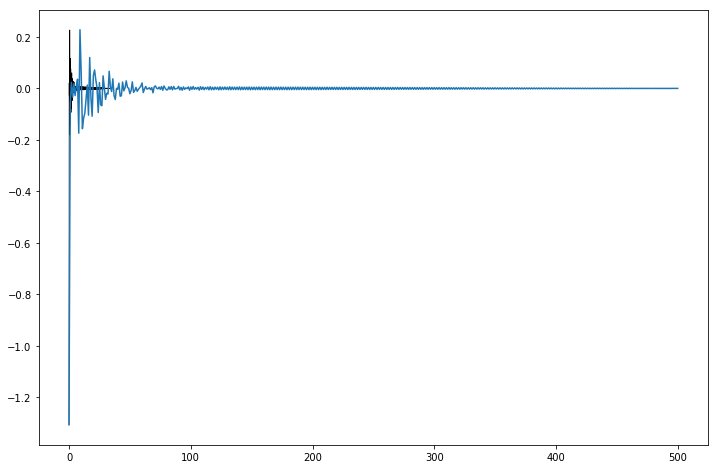

In [20]:
fig=plt.figure(figsize=(12,8) )
plt.plot(kindex,COEF[1,3,:], color='black', linewidth=0.7, linestyle="-")
plt.plot(kindex1,COEF1[1,3,:])
#plt.plot(kindex1,COEF1[:,0])

In [21]:
#Coef Ao
Integral = np.zeros(shape=(nF,Ndonor))
s  = np.linspace(0, SF, NP)
#sd = np.linspace(0, 1, NP)
for i in range(0,nF):
    for j in range(0,Ndonor):
        Vo=VS[i,j,:]
        I = [integrate.simps(SE_grid, Vo)/ SF] 
        Integral[i,j] = np.array(I)

#for k in range(0,NP):
#    func = lambda sn: Vpot(sn,)
#    Integral=0
#    for i in range(len(ss)-1):
#        I,error = integrate.quad(func, sn[i],sn[i+1], limit=1000)
#        Integral=Integral + I
        #print(Integral)
#    IntF[k]=Integral


In [59]:
#Convergencia 
NP= Nelectron
Sn = np.linspace(0, SF,NP)
sumav = np.zeros(NP)

for k in range(1,NP+1): 
        suma =  SIN_C[0,3,k-1]*np.sin(kindex[k-1]*SE_grid) + COEF[0,3,k-1]*np.cos(kindex[k-1]*SE_grid) 
        sumav = sumav + suma 
  


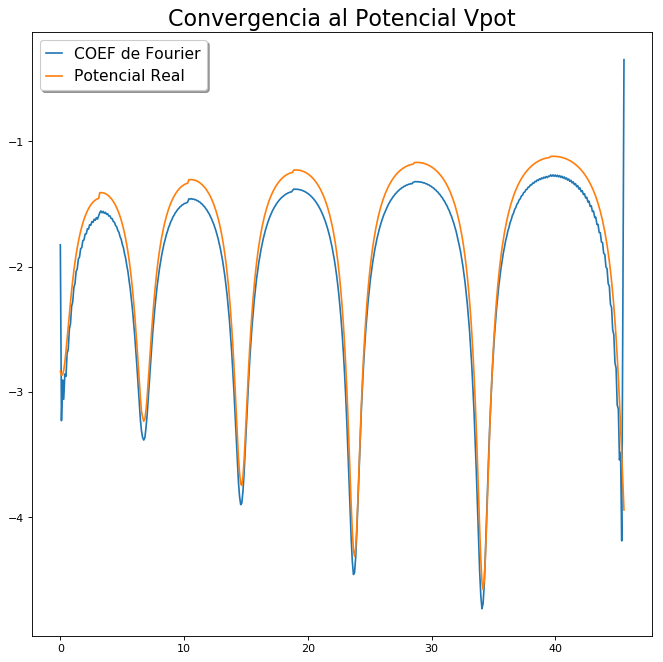

In [65]:
plt.figure(figsize=(10, 10), dpi=80)
plt.plot(SE_grid,  sumav[:] ) #+ 0.5)
plt.plot(SE_grid, VS[0,3,:] -0.5 )
plt.title('Convergencia al Potencial Vpot',loc='center',fontsize=20)
plt.legend(( 'COEF de Fourier',  'Potencial Real', ),shadow=True, handlelength=1, fontsize=14)
#plt.savefig('Convergencia.png',format='png', dpi=1000,bbox_inches="tight")

### Formación de Matriz $ A_{mn}= \frac{\pi^2 n^2}{S_F^2} \delta _{n,n'} +  I ( | n-n'|) - I( n+ n') $

#### donde $ I(k)= \frac{1}{S_F} \int \limits_0 ^{SF} V_{pot}(S) \cos\left(\frac{k\pi}{S_f}s\right) \mathrm{d}s $

In [45]:
nd=int(Nelectron/2)
AR=np.zeros(shape=(nd,nd)) # Empty Array "2Dimencional"
eigenvalues = np.zeros(shape=(nF,Ndonor,nd))
eigenvectors = np.zeros(shape=(nF,Ndonor,nd,nd))
Ee = np.zeros(shape=(nF,Ndonor,nd))
VecR = np.zeros(shape=(nF,Ndonor,nd,nd))

for j in range(0,nF):
    for s in range(0,Ndonor):
        for k in range(0,nd):
            for k1 in range(0,nd):
                ka=abs(k-k1)
                AR[k,k1]= (COEF[j,s,ka] - COEF[j,s,k+k1])/2
                if (k == k1):
                    AR[k,k1]=AR[k,k1]+(np.pi*k/sf)**2
        eigenvalues[j,s] ,eigenvectors[j,s] = np.linalg.eigh(AR)

   #     w : (…, M) ndarray  #The eigenvalues in ascending order, each repeated according to its multiplicity.

#v : {(…, M, M) ndarray, (…, M, M) matrix}  #The column v[:, i] is the normalized eigenvector corresponding to the eigenvalue w[i]. Will return a matrix object if a is a matrix object

for j in range(0,Ndonor):
    for f in range(nF):
   # eigein_value=np.sort(eigenvalues[:,j])
    # eigein_vector=np.sort(eigenvectors[:,j])
        Ee[f,j]   =  eigenvalues[f,j,0:nd] # eigein_value[0:nd]
        VecR[f,j] =  eigenvectors[f,j,0:nd,0:nd] #eigein_vector[0:nd,0:nd]

#plt.plot(phi_D,Ee[0,:,0:10])

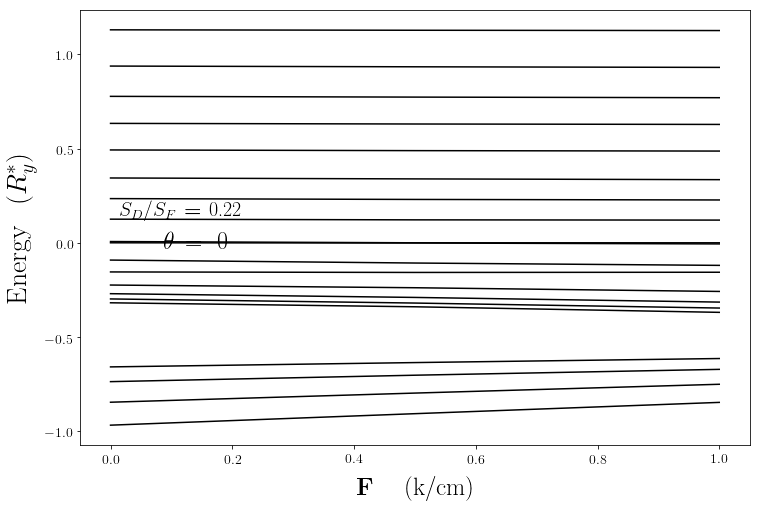

In [307]:
fig=plt.figure(figsize=(12,8) )#pi=1000)
ax = fig.add_subplot(1, 1, 1)

plt.xlabel(r'\textbf{F} \, \, (k/cm)',labelpad=10,fontsize=25,fontweight='bold', horizontalalignment ='center')
plt.ylabel(r'Energy \,  ($R_y^*$)',labelpad=6,fontsize=28,fontweight='bold', horizontalalignment ='center')
plt.rc('text', usetex=True)
plt.rc('font', family='DejaVu Sans')
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
#plt.xlim(0.15,1.2)
#plt.ylim(-1.2,-0.1)
#plt.annotate(r'\textbf{F = 0 k/cm}', xy=(180, 470), xycoords='figure points',fontsize=20)
#plt.annotate(r'\textbf{$E_1$}', xy=(560, 100), xycoords='figure points',fontsize=20)

plt.annotate(r'\textbf{$S_D/S_F$ = }0.22', xy=(120, 290), xycoords='figure points',fontsize=20)
plt.annotate('$\, \, \\theta\,   = \, \,  0$', xy=(163, 260), xycoords='figure points',fontsize=24)



plt.plot(Camp_F/0.17,Ee[:,4,0:20], color='black')
#plt.savefig('F-energy01.png',format='png', dpi=1000,bbox_inches="tight")
#plt.savefig('F-energy01.pdf',format='pdf', dpi=1000,bbox_inches="tight")


## Making the electronic density of states DOS

In [73]:
nEe= nd # #Number of eigenvalues
#ncrv = 4  # Number of  SD
Np = 200  #Number of points to graph 
F = np.zeros((Np,Ndonor,nF)) 
X = np.zeros(Np)
Emin = -4.0 #np.min(Ee)
Emax = 0.0 #np.max(Ee)

Energy_grid = np.linspace(Emin, Emax,Np)

s=0.03
def fg(x,x0,s):
    return (s/((x-x0)**2+s**2))/np.pi

for i in range(0,Np):
    x = Energy_grid[i]
    X[i]= x
    for j in range(0,nF):
        for k in range(0,nEe): 
            x0=Ee[j,:,k]
            F[i,:,j] = F[i,:,j] + fg(x,x0,s)

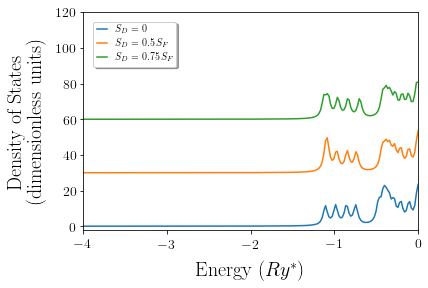

In [75]:
#from scipy.interpolate import UnivariateSpline
#fc1 =   UnivariateSpline(X,F[:,0]) 
#fc2 =   UnivariateSpline(X,F[:,1]) 
#fc3 =   UnivariateSpline(X,F[:,2]) 

#fc1.set_smoothing_factor(0.000001)
#fc2.set_smoothing_factor(0.000001)
#fc3.set_smoothing_factor(0.000001)
plt.ylim(-2, 120)
plt.xlim(-4, 0)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.plot(X,F[:,0,0], X,F[:,1,0] + 30, X,F[:,2,0] + 2*30 )#,marker='o',markersize=0.7,linestyle='')

#plt.title('$Caso: R_0= 1 a_0^*$, $\Delta= 0.1 a_0^*$',loc='center',fontsize=20)

plt.xlabel(r'Energy ($Ry^*$) ', labelpad=10,fontsize=20,fontweight='bold', horizontalalignment='center')           
plt.ylabel(r'Density of States \\(dimensionless units)',labelpad=10,fontsize=20,fontweight='bold', horizontalalignment ='center')     

plt.legend(('$S_D = 0 $', '$S_D=0.5 \, S_F$', '$S_D=0.75 \, S_F$'), shadow=True, loc=(0.03, 0.75), handlelength=1, fontsize=10)
#plt.savefig('5c.pdf',format='pdf', dpi=1000,bbox_inches="tight")
